In [1]:
import numpy as np
import matplotlib.pyplot as plt
px = 1/plt.rcParams['figure.dpi']

def GreenFunction(x,y,xprime,yprime):
    return -1/(4*np.pi)*np.log((x-xprime)**2+(y-yprime)**2)

def DerivativeGreenFunction(x,y,xprime,yprime):
    a = 2*np.pi*((x-xprime)**2+(y-yprime)**2)
    return (x-xprime)/a,(y-yprime)/a # no minus here as two minus cancel

def PotentialExternal(x,y,a,b):
    return a*x+b*y

def EExternal(x,y,a,b):
    A = np.ones([len(x),len(y)])*a
    B = np.ones([len(x),len(y)])*b
    return -A,-B

N = 500
x = np.linspace(-2,2,N)
y = np.linspace(-2,2,N)
X,Y = np.meshgrid(x,y)
xprime = 1
yprime = 0

Green = GreenFunction(X,Y,xprime,yprime) # Green function is the impulse reponse of the potential
E_Fieldx,E_Fieldy = DerivativeGreenFunction(X,Y,xprime,yprime)
absE = np.sqrt((E_Fieldx**2+E_Fieldy**2))
a = 1 # E-Field is -d/dr(Phi) so E-Field from right to left is a=1
b = 0
Phi_ext = PotentialExternal(X,Y,a,b)
E_ext_x,E_ext_y = EExternal(X,Y,a,b)


(<matplotlib.colorbar.Colorbar at 0x22d67d088d0>,
 Text(0.5, 0, 'x-coordinate'),
 Text(0, 0.5, 'y-coordinate'))

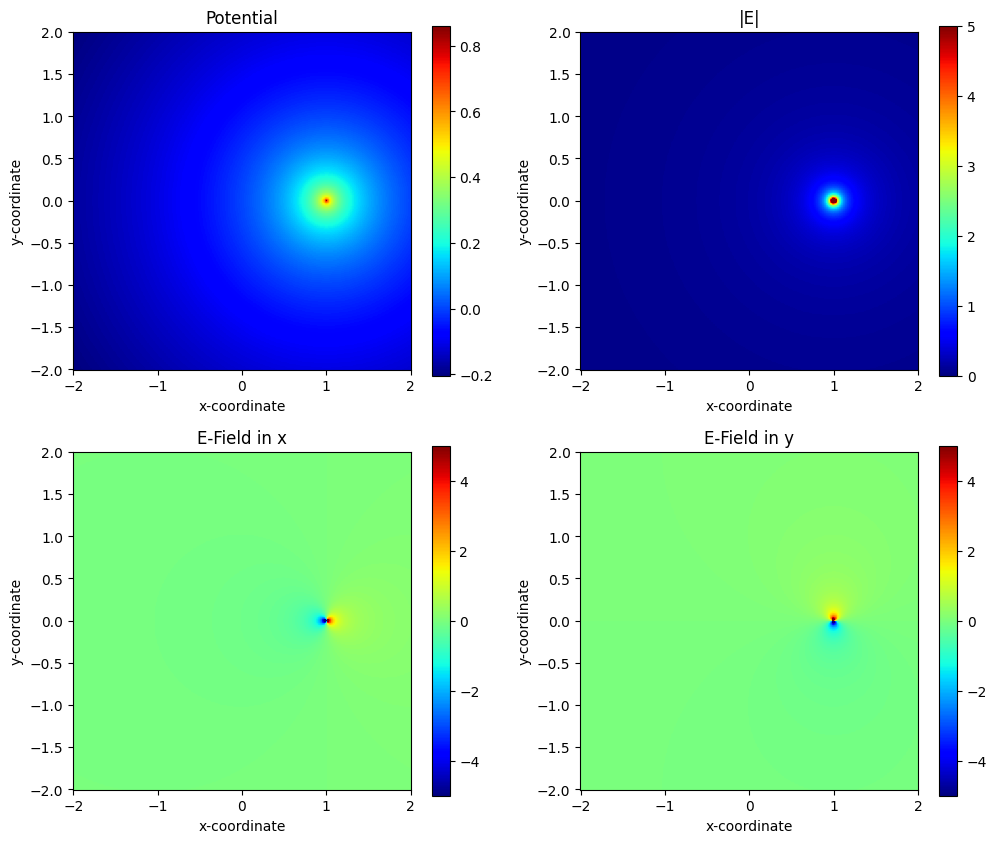

In [9]:
fig = plt.figure(figsize=(1200*px, 1000*px))
ax1 = fig.add_subplot(2,2,1)
ax1.set_title('Potential'),ax1.set_aspect('equal')
colormesh1 = ax1.pcolormesh(X,Y,Green,shading='auto',cmap='jet')
fig.colorbar(colormesh1),ax1.set_xlabel('x-coordinate'),ax1.set_ylabel('y-coordinate')
ax2 = fig.add_subplot(2,2,3)
ax2.set_title('E-Field in x'),ax2.set_aspect('equal')
colormesh2 = ax2.pcolormesh(X,Y,E_Fieldx,shading='auto',cmap='jet', vmin=-5, vmax=5)
fig.colorbar(colormesh2),ax2.set_xlabel('x-coordinate'),ax2.set_ylabel('y-coordinate')
ax3 = fig.add_subplot(2,2,4)
ax3.set_title('E-Field in y'),ax3.set_aspect('equal')
colormesh3 = ax3.pcolormesh(X,Y,E_Fieldy,shading='auto',cmap='jet', vmin=-5, vmax=5)
fig.colorbar(colormesh3),ax3.set_xlabel('x-coordinate'),ax3.set_ylabel('y-coordinate')
ax4 = fig.add_subplot(2,2,2)
ax4.set_title('|E|'),ax4.set_aspect('equal')
colormesh4 = ax4.pcolormesh(X,Y,absE,shading='auto',cmap='jet', vmin=0, vmax=5)
fig.colorbar(colormesh4),ax4.set_xlabel('x-coordinate'),ax4.set_ylabel('y-coordinate')

In [3]:
def MakeM(r,n):
    M = np.eye(n)
    for i in range(len(r[:,0])):
        for j in range(len(r[:,0])):
            if i != j:
                M[i,j] = GreenFunction(r[i,0],r[i,1],r[j,0],r[j,1])
    M = M - np.eye(n)
    return M

def GetPhiTot(r,Phi_ext,rho):
    Phi_Points = np.zeros([N,N])
    for i in range(len(rho)):
        Phi_Points += rho[i]*GreenFunction(X,Y,r[i,0],r[i,1])
    Phi_Tot = Phi_ext + Phi_Points
    return Phi_Tot

def GetETot(r,E_ext_x,E_ext_y,rho):
    E_x_tot = np.zeros([N,N])
    E_y_tot = np.zeros([N,N])
    for i in range(len(rho)):
        E_x,E_y = DerivativeGreenFunction(X,Y,r[i,0],r[i,1])
        E_x_tot += rho[i]*E_x
        E_y_tot += rho[i]*E_y
    E_x_tot = E_x_tot + E_ext_x
    E_y_tot = E_y_tot + E_ext_y
    E_Tot = np.sqrt(E_x_tot**2+E_y_tot**2)
    return E_Tot

# Define source points
n = 20
r = np.zeros([n,2])
r[:,0] = np.cos(np.linspace(0,2*np.pi,n+1)[:-1])
r[:,1] = np.sin(np.linspace(0,2*np.pi,n+1)[:-1])

# Calculate the charges
B = -PotentialExternal(r[:,0],r[:,1],a,b)
M = MakeM(r,n)
rho = np.linalg.inv(M)@B

# Evaluate Potential and E-Field at these points
Phi_Tot = GetPhiTot(r,Phi_ext,rho)
E_Tot = GetETot(r,E_ext_x,E_ext_y,rho)

In [4]:
# Area in the pipe
E_Inner = E_Tot[220:280,220:280]
E_InnerSum = sum(sum(E_Inner))
EdgesInner = np.linspace(0,1,4)
EdgesInner[0] = E_Inner[0,0]
EdgesInner[1] = E_Inner[0,-1]
EdgesInner[2] = E_Inner[0,0]
EdgesInner[3] = E_Inner[0,-1]
EdgesInner_index = np.zeros([4,2])
EdgesInner_index[0,:] = x[220],y[220]
EdgesInner_index[1,:] = x[220],y[280]
EdgesInner_index[2,:] = x[280],y[220]
EdgesInner_index[3,:] = x[280],y[280]

(<matplotlib.colorbar.Colorbar at 0x22d5daa3d10>,
 Text(0.5, 0, 'x-coordinate'),
 Text(0, 0.5, 'y-coordinate'))

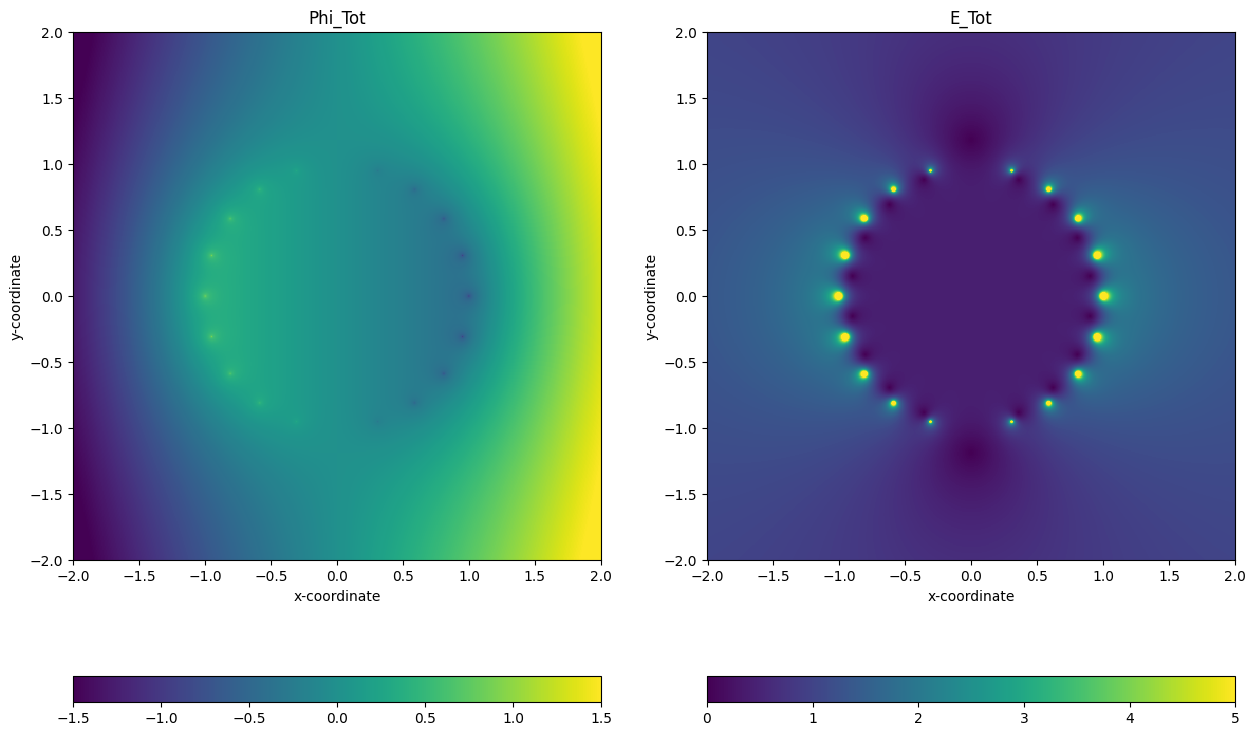

In [5]:
fig = plt.figure(figsize=(1200*px, 1000*px))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Phi_Tot'),ax1.set_aspect('equal')
colormesh1 = ax1.pcolormesh(X,Y,Phi_Tot,shading='auto',cmap='viridis', vmin=-1.5, vmax=1.5)
fig.colorbar(colormesh1,orientation='horizontal'),ax1.set_xlabel('x-coordinate'),ax1.set_ylabel('y-coordinate')
#ax1.scatter(r[:,0],r[:,1],marker='o',color='white')
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('E_Tot'),ax2.set_aspect('equal')
colormesh2 = ax2.pcolormesh(X,Y,E_Tot,shading='auto',cmap='viridis', vmin=0, vmax=5)
fig.colorbar(colormesh2,orientation='horizontal'),ax2.set_xlabel('x-coordinate'),ax2.set_ylabel('y-coordinate')
#ax2.scatter(EdgesInner_index[:,0],EdgesInner_index[:,1],marker='o',color='red')
#ax2.scatter(r[:,0],r[:,1],marker='o',color='white')

In [14]:
def GetInnerE(E_Tot):
    E_Inner = E_Tot[220:280,220:280]
    E_InnerSum = sum(sum(E_Inner))
    return E_InnerSum

n = np.array([10,20,50,100,200,500])
E_InnerSum = np.linspace(0,1,len(n))
# fig,ax = plt.subplots(1)
for i in range(len(n)):
    r= np.zeros([n[i],2])
    r[:,0] = np.cos(np.linspace(0,2*np.pi,n[i]+1)[:-1])
    r[:,1] = np.sin(np.linspace(0,2*np.pi,n[i]+1)[:-1])
    # ax.scatter(r[:,0],r[:,1]),ax.set_aspect('equal')
    B = -PotentialExternal(r[:,0],r[:,1],a,b)
    M = MakeM(r,n[i])
    rho = np.linalg.inv(M)@B
    Phi_Tot = GetPhiTot(r,Phi_ext,rho)
    E_Tot = GetETot(r,E_ext_x,E_ext_y,rho)
    E_InnerSum[i] = GetInnerE(E_Tot)

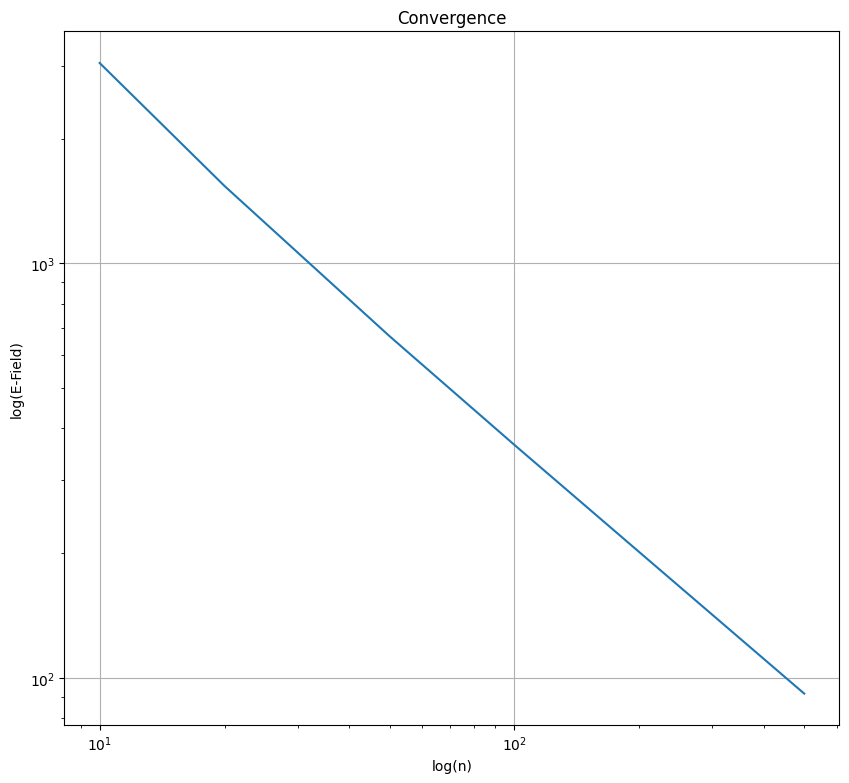

In [15]:
fig = plt.figure(figsize=(1000*px, 1000*px))
ax1 = fig.add_subplot(1,1,1)
ax1.set_title('Convergence'),ax1.set_aspect('equal'),ax1.grid()
ax1.set_xlabel('log(n)'),ax1.set_ylabel('log(E-Field)')
ax1.loglog(n,E_InnerSum)